# 시계열 데이터 분석 (정석)

ACF plot과 PACF plot을 통해 모수를 추정하여 차분을 수행하여 분석하는 방법

## #01. 작업준비

### 패키지 참조

In [17]:
import pandas as pd 

from matplotlib import pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from pmdarima.arima import auto_arima
import seaborn as sb
import datetime
import sys



### 데이터 가져오기

> 이미 앞 예제를 통해 데이터가 비정상성임을 확인함

In [5]:
df =  pd.read_excel("https://data.hossam.kr/E06/air_passengers.xlsx")
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

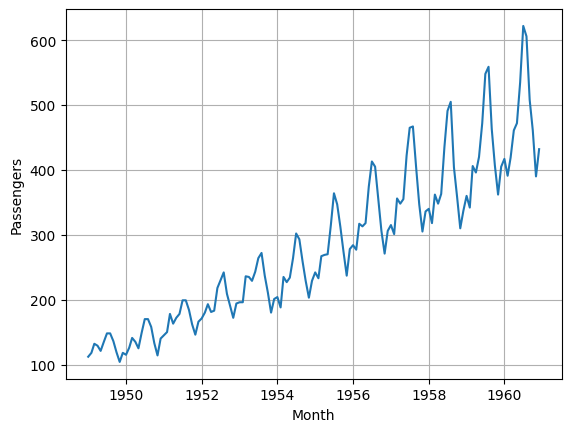

In [7]:
## 데이터 시각호

plt.figure()
sb.lineplot(df,x="Month",y='Passengers')
plt.grid()
plt.show()
plt.close()
### 데이터가 비정상성을 띈다.

In [8]:
### 원본데이터에 대한 ADF 테스트 
## 데이터가 정상성을 띄는지 안띄는지 여부

adf = adfuller(df['Passengers'])
print('p-value',adf[1])
## 0.05 보다 크기 떄문에 정상성을 띄지않음
## 차분해여함


p-value 0.991880243437641


In [9]:
### 1차 차분 ㄱㄱ 

diff = df['Passengers'].diff().dropna()
diff

1       6.0
2      14.0
3      -3.0
4      -8.0
5      14.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: Passengers, Length: 143, dtype: float64

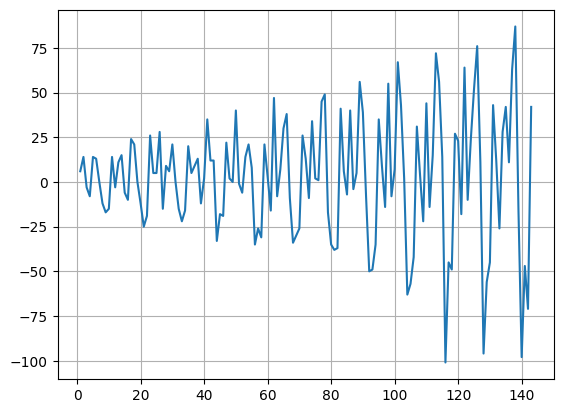

In [11]:
## 차분결과 시각화

plt.figure()
sb.lineplot(x= diff.index,y=diff.values)
plt.grid()
plt.show()
plt.close()
## 분산이 ㅄ인것을 확인

In [13]:
## 차분 결과에 대한 ADF 테스트 
adf  = adfuller(diff.values)
print('p-value : ',adf[1])

p-value :  0.0542132902838255


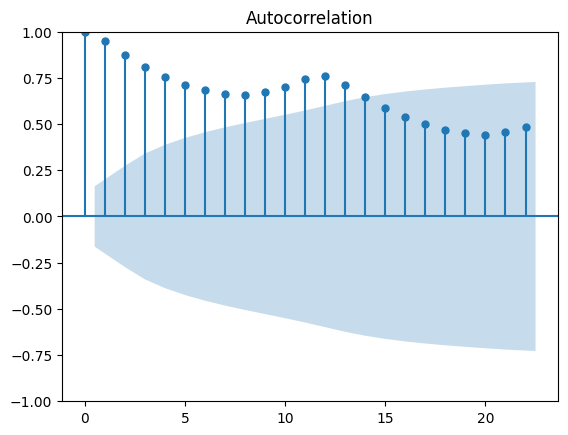

In [14]:
## ACF, PACF
## ACF Plot
plot_acf(df['Passengers'])
plt.show()
plt.close()

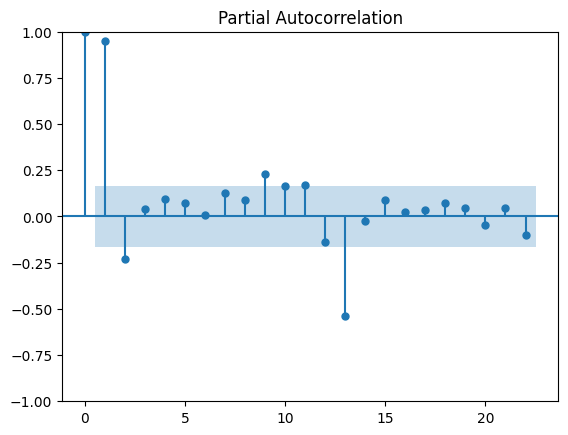

In [15]:
## PACF
plot_pacf(df['Passengers'])
plt.show()
plt.close()

### AR모델 ㄱㄱ 

In [18]:
##  ARIMA 분석 ㄱㄱ
model = ARIMA(df['Passengers'],order=(1,1,0))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Thu, 03 Aug 2023   AIC                           1401.852
Time:                        13:42:10   BIC                           1407.778
Sample:                             0   HQIC                          1404.260
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 4.91
Prob(Q):                              0.42   Prob(JB):                         0.09
Heteroskedasticity (H):               8.35   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
## 학습결과에 대해 예측값 생성
start_index = 0
end_index = len(df['Passengers'])
pd = fit.predict(start = start_index,end = end_index)
pd

0        0.000000
1      112.038959
2      119.839303
3      136.291707
4      128.080349
          ...    
140    601.095192
141    477.958052
142    446.592127
143    368.234915
144    444.875121
Name: predicted_mean, Length: 145, dtype: float64

In [22]:
##이후 열단계 예측값 생성

fc = fit.predict(10)


In [23]:
## 비교결과 시각화

x= list(range(0,len(df),40))
xlabels = []
for i in x :
    xlabels.append(df.loc[i,'Month'].strftime("%Y-%m-%d"))
xlabels

['1949-01-01', '1952-05-01', '1955-09-01', '1959-01-01']

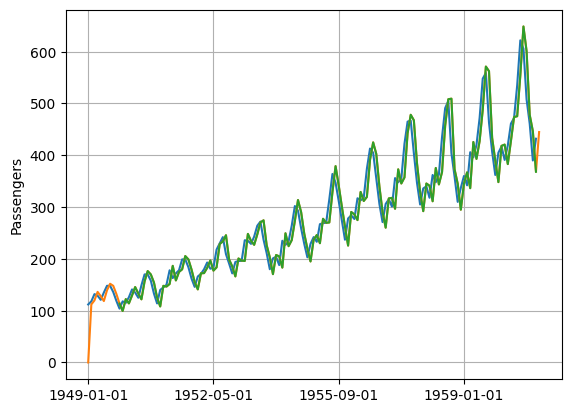

In [24]:
plt.figure()
sb.lineplot(x=df.index, y=df['Passengers']) # 원본
sb.lineplot(x=pd.index, y=pd)           # 원본을 토대로 학습하여 예측한 값
sb.lineplot(x=fc.index, y=fc)           # 이후 10단계를 예측한 값

plt.xticks(x, xlabels, rotation=0)

plt.grid()
plt.show()
plt.close()

In [25]:
model = auto_arima(x=df['Month'],
                   y=df['Passengers'],
                   d=1,
                   start_p=1,
                   max_p=3,
                   start_q=1,
                   max_q=3,
                   seasonal=True,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [26]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -682.543
Date:                Thu, 03 Aug 2023   AIC                           1377.086
Time:                        13:46:14   BIC                           1394.863
Sample:                             0   HQIC                          1384.310
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2580      0.135      1.914      0.056      -0.006       0.522
ar.L2          0.3732      0.136      2.736      0.006       0.106       0.641
ar.L3         -0.3367      0.125     -2.684      0.0